In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Read dataset

In [4]:
## read data from drive
missing_values = ["n/a", "na", "--", " ", "Null", "-", "NaN", -200 ]
data_xlxs = pd.read_excel(open('/content/AirQualityUCI.xlsx', 'rb'), na_values=missing_values )
data_df = pd.DataFrame(data_xlxs, columns=data_xlxs.columns[0:])

#Dataset infos


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

# Handle Missing values

In [6]:
# print(data_df.columns[0:])
air_df = data_df.iloc[0:, 0:]
# print(air_df.mean())

## -200 indicates missing value, replace with 'mean' value of the column
air_df = air_df.mask( air_df == -200 )
# print(air_df.mean())
air_df = air_df.fillna(air_df.mean())

air_df = air_df.astype({"Date": str , "Time": str})
air_df['DateTime'] = air_df.Date + ' '+ air_df.Time
air_df['DateTime'] = pd.to_datetime(air_df.DateTime)

# converting time to int for easier ploting
air_df['Time'] = pd.to_datetime(air_df['Time']).dt.hour

# print(air_df.columns[0:])
# air_df.dtypes
air_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,18,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


#Air Quality dataset description

In [7]:
attributes = air_df.columns.to_list()
air_df.drop(columns=['Date', 'Time', 'DateTime']).describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


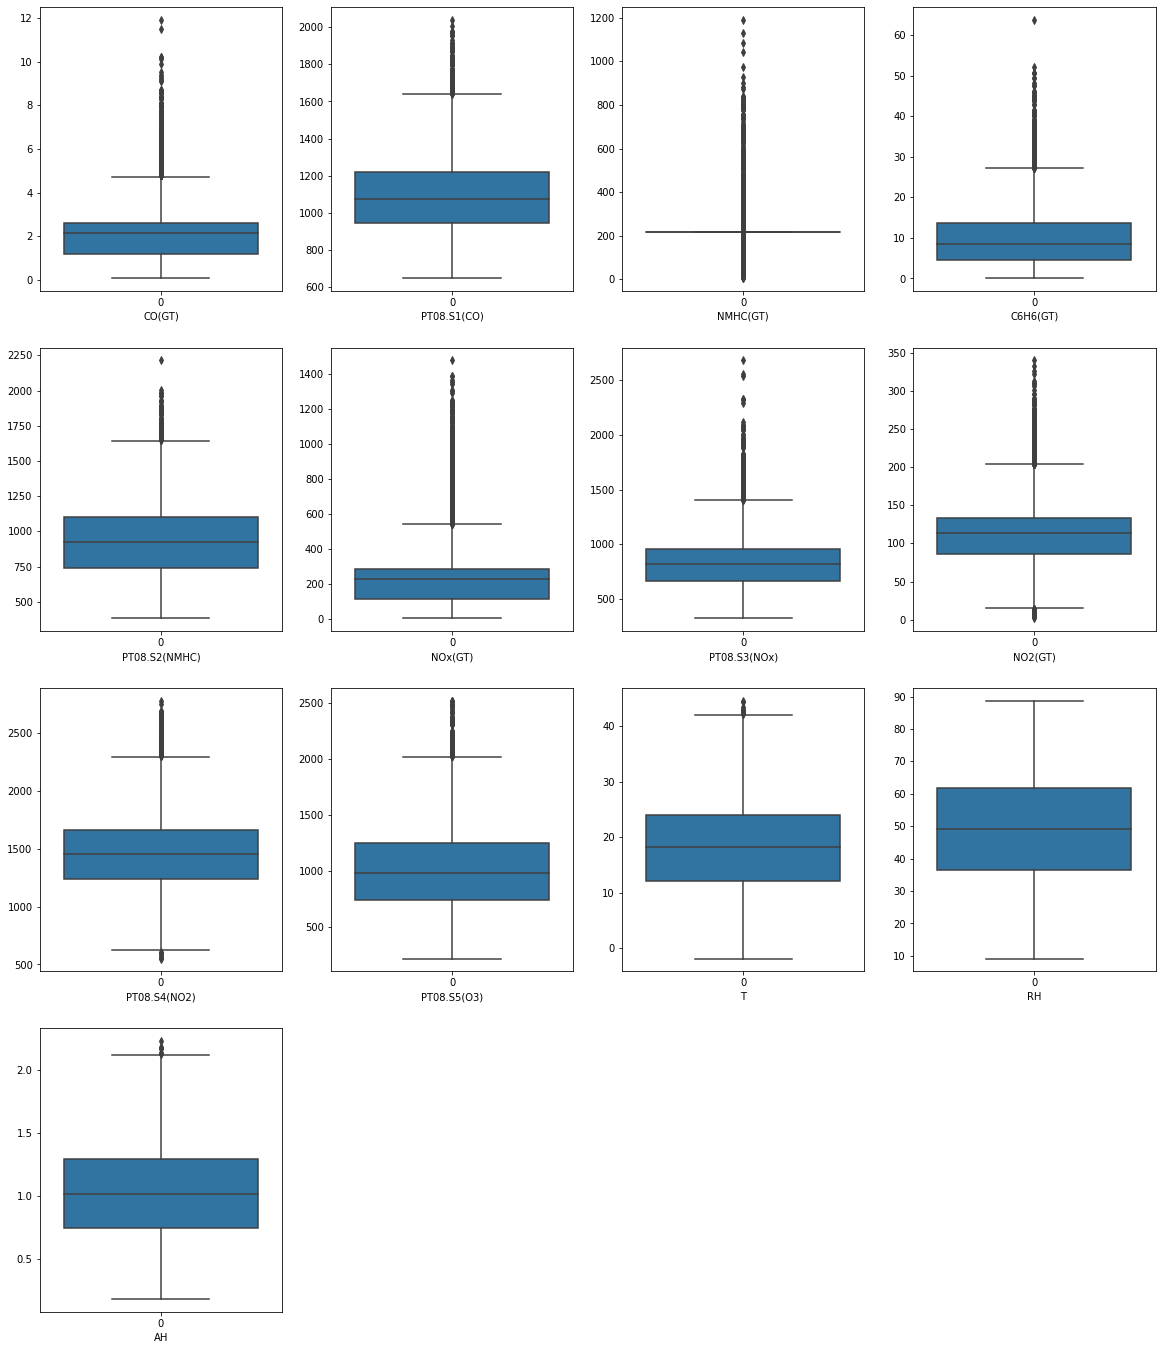

In [ ]:
# Box plot of the attributes
plt.figure( figsize=(20,24) )
for i in range( 2 , 15 ):
    plt.subplot(4 , 4, i-1)
    # plt.boxplot(  x= air_df[ attributes[i] ])
    sns.boxplot(data= air_df[attributes[i]] )
    plt.xlabel( attributes[i])



# Analysis of "Carbon Monoxide" attribute 

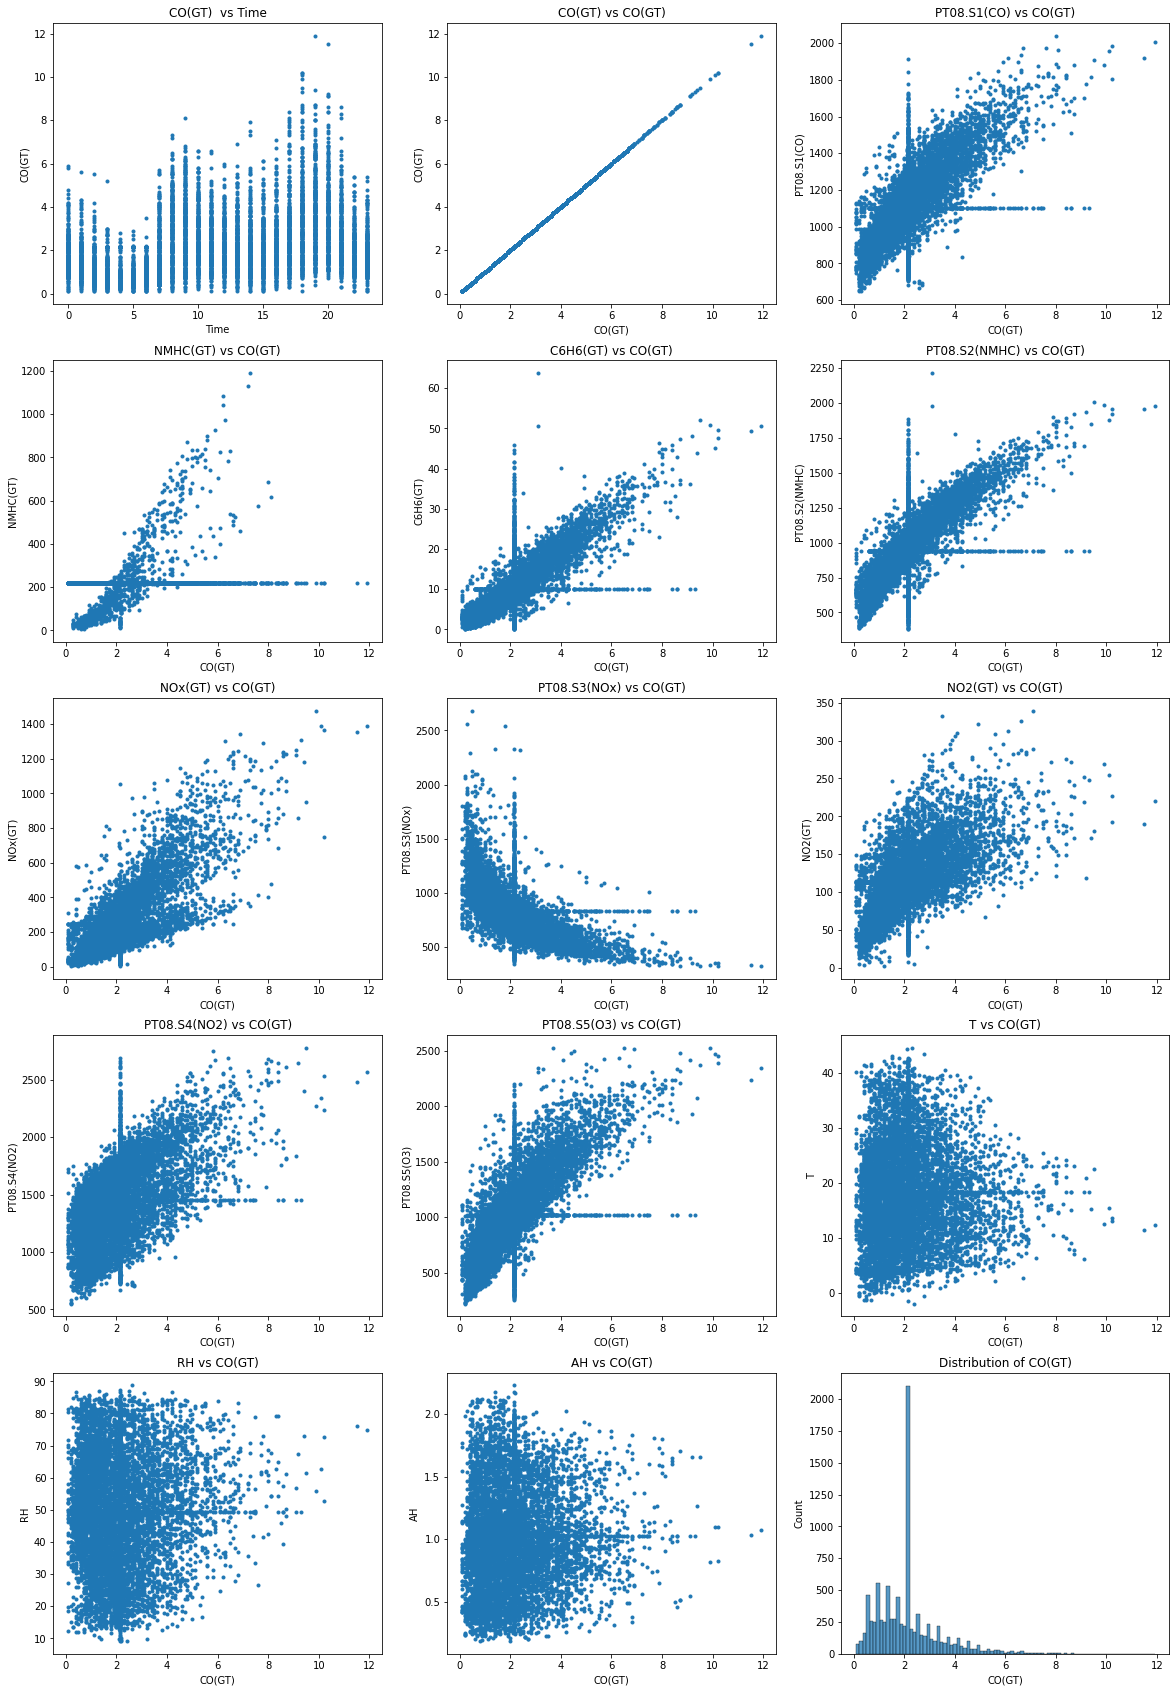

In [ ]:
plt.figure( figsize=(20,30) )

plt.subplot(5 , 3, 1)
plt.scatter(  y = air_df[ "CO(GT)" ], x =air_df["Time"], marker="." )
plt.ylabel("CO(GT)")
plt.xlabel("Time")
plt.title ("CO(GT)  vs " + "Time")

for i in range( 2 , 15 ):
    plt.subplot(5 , 3, i)
    plt.scatter(  x= air_df[ "CO(GT)" ], y=air_df[ air_df.columns[i]], marker="." )
    plt.xlabel("CO(GT)")
    plt.ylabel(attributes[i])
    plt.title (  attributes[i] +" vs CO(GT)")
    
plt.subplot(5 , 3, i+1)
sns.histplot(air_df['CO(GT)'])
plt.title ( "Distribution of CO(GT)")
plt.show()

# Analysis of "Tin Oxide" attribute 

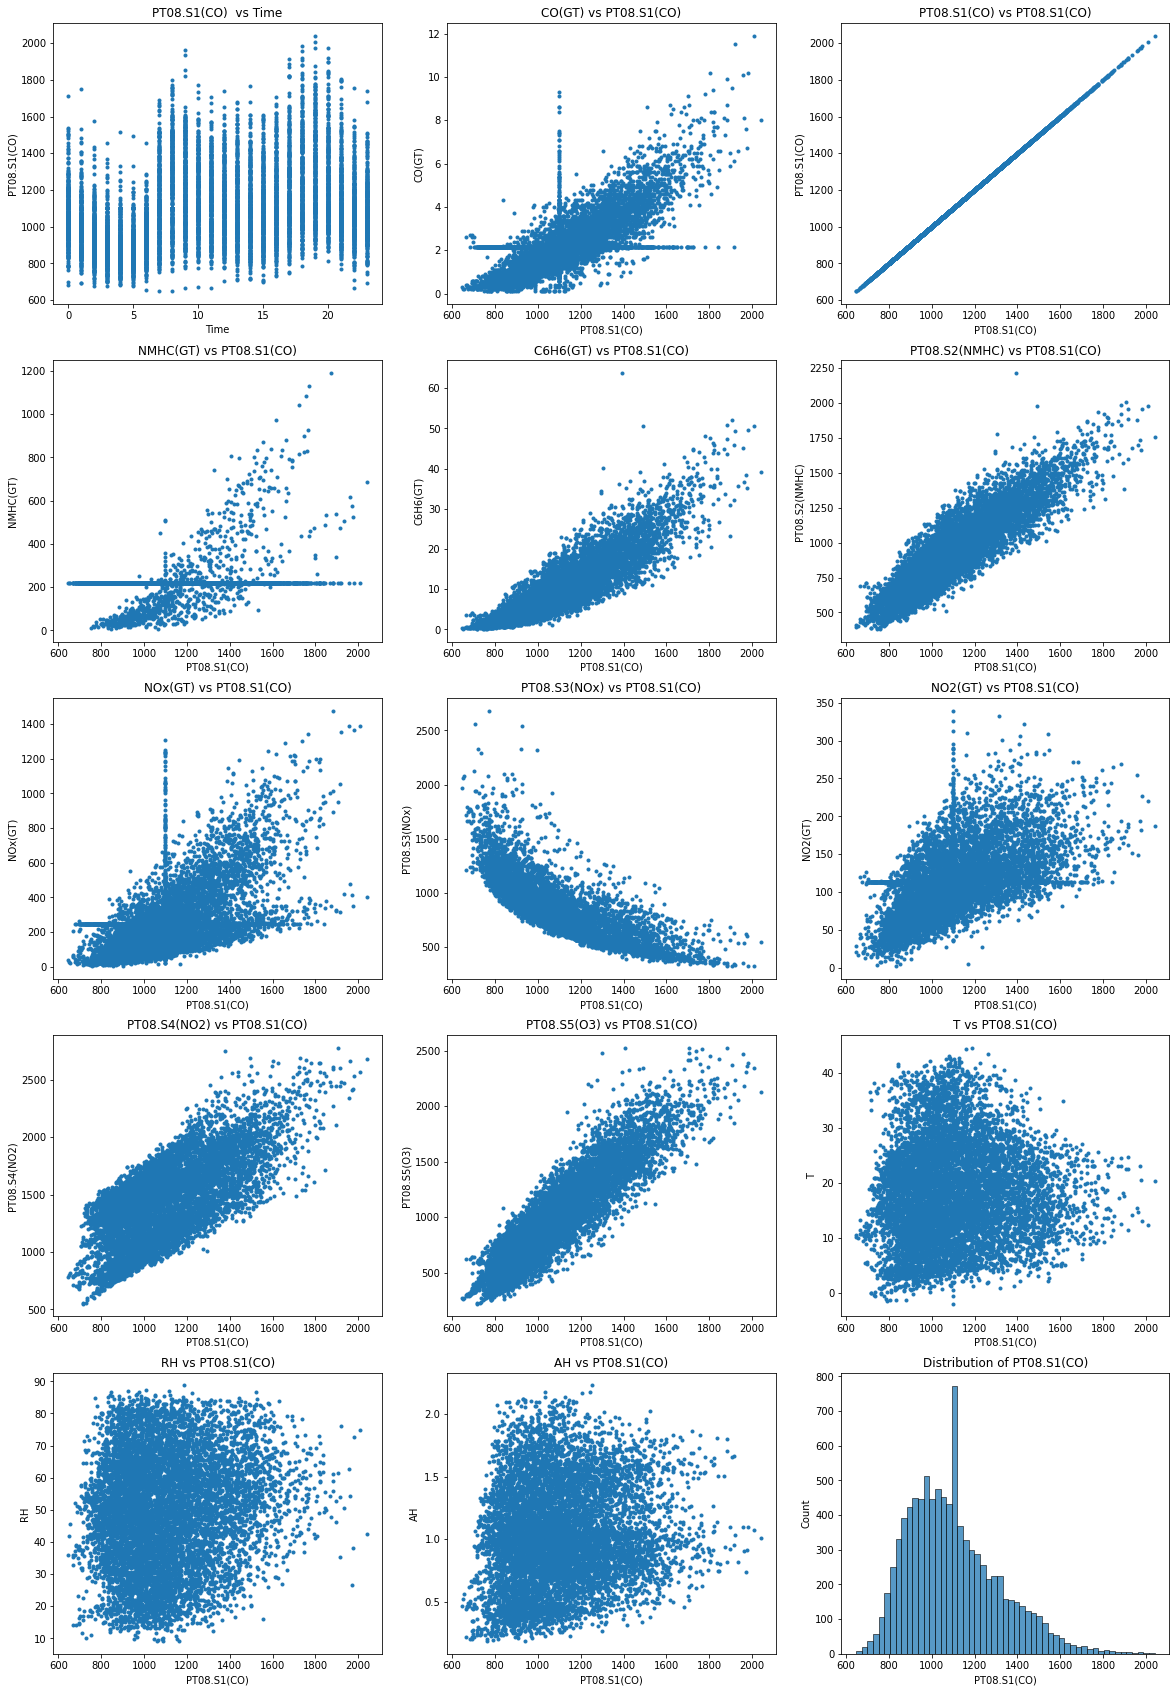

In [ ]:
plt.figure( figsize=(20,30) )

plt.subplot(5 , 3, 1)
plt.scatter(  y = air_df[ "PT08.S1(CO)" ], x =air_df["Time"], marker="." )
plt.ylabel("PT08.S1(CO)")
plt.xlabel("Time")
plt.title ("PT08.S1(CO)  vs " + "Time")

for i in range( 2 , 15 ):
    plt.subplot(5 , 3, i)
    plt.scatter(  x= air_df[ "PT08.S1(CO)" ], y=air_df[ air_df.columns[i]], marker="." )
    plt.xlabel("PT08.S1(CO)")
    plt.ylabel(attributes[i])
    plt.title (  attributes[i] +" vs PT08.S1(CO)")
    
plt.subplot(5 , 3, i+1)
sns.histplot(air_df["PT08.S1(CO)"])
plt.title ( "Distribution of PT08.S1(CO)")
plt.show()

# Analysis of "Nitrogen Dioxide" attribute

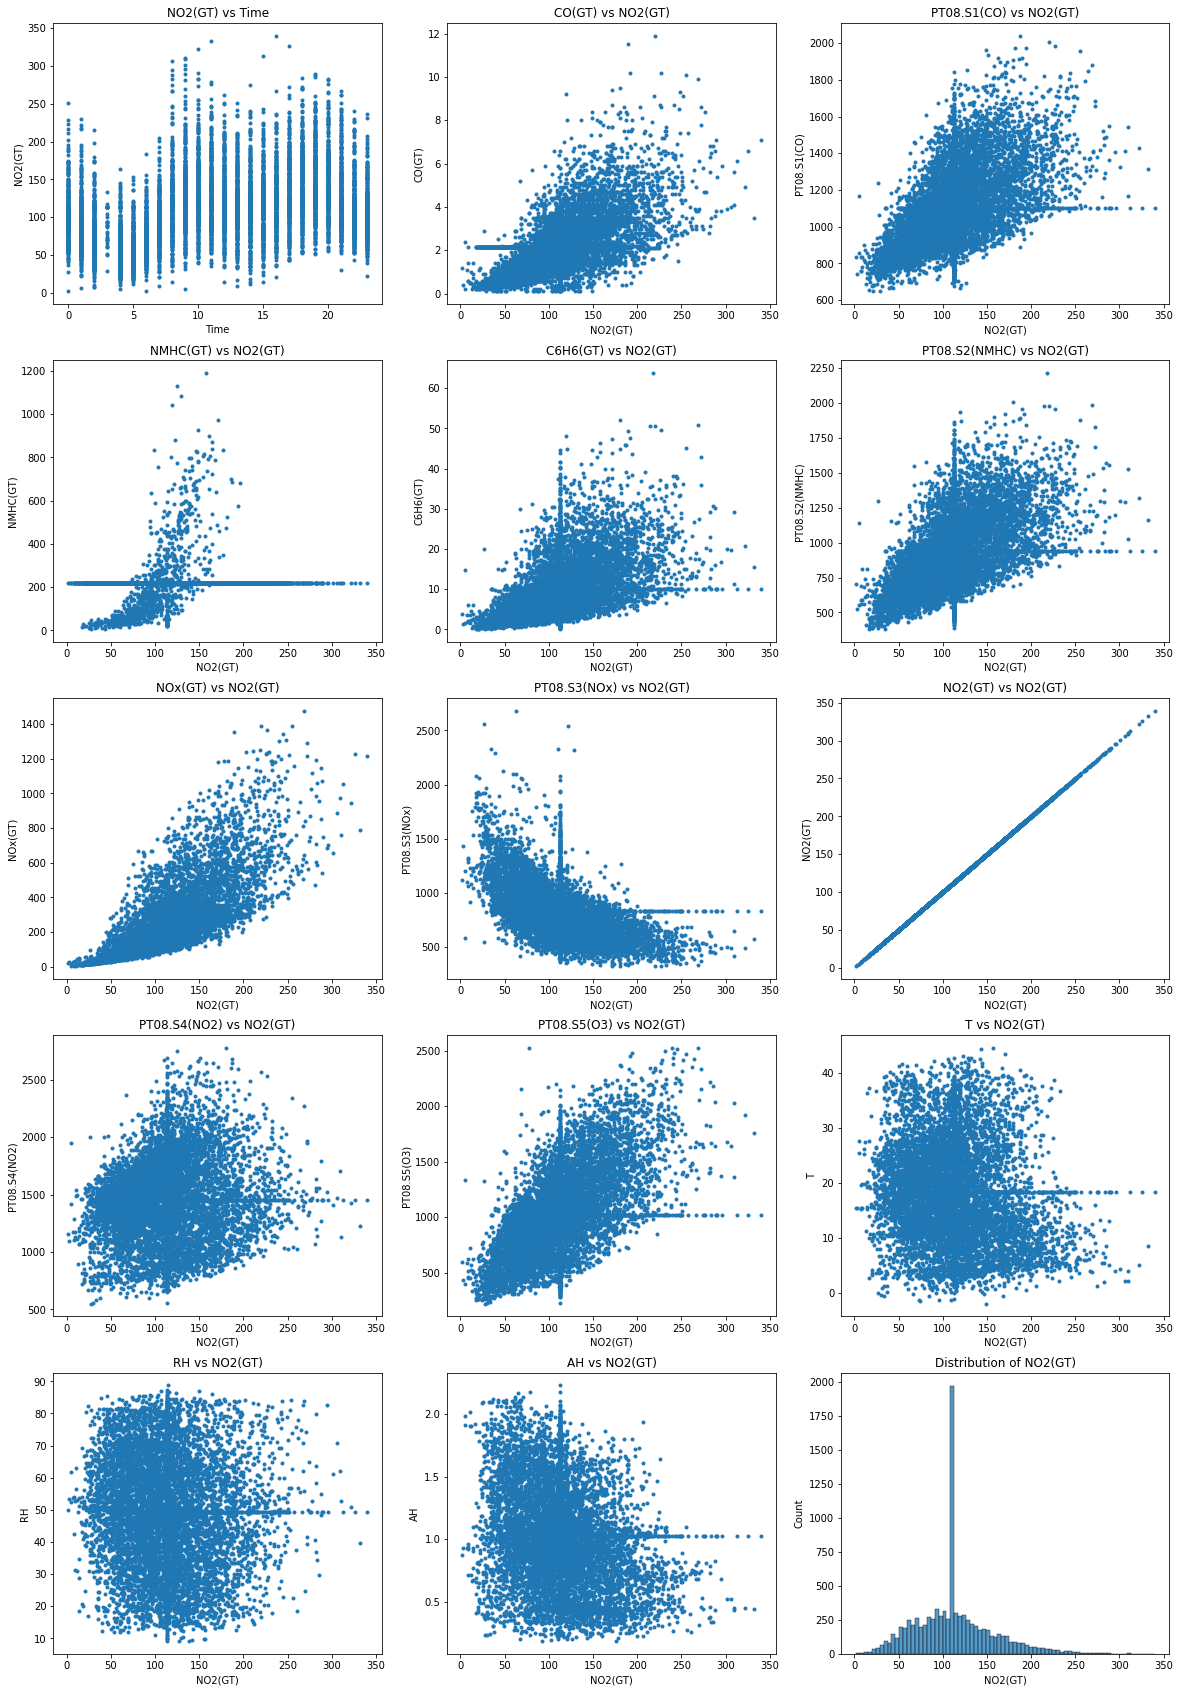

In [ ]:
plt.figure( figsize=(20,30) )

plt.subplot(5 , 3, 1)
plt.scatter(  y = air_df[ "NO2(GT)" ], x =air_df["Time"], marker="." )
plt.ylabel("NO2(GT)")
plt.xlabel("Time")
plt.title ("NO2(GT) vs Time")

for i in range( 2 , 15 ):
    plt.subplot(5 , 3, i)
    plt.scatter(  x= air_df[ "NO2(GT)" ], y=air_df[ air_df.columns[i]], marker="." )
    plt.xlabel("NO2(GT)")
    plt.ylabel(attributes[i])
    plt.title (  attributes[i] +" vs NO2(GT)")
    
plt.subplot(5 , 3, i+1)
sns.histplot(air_df[ "NO2(GT)"])
plt.title ( "Distribution of NO2(GT)")
plt.show()

# Analysis of "Benzene" attribute

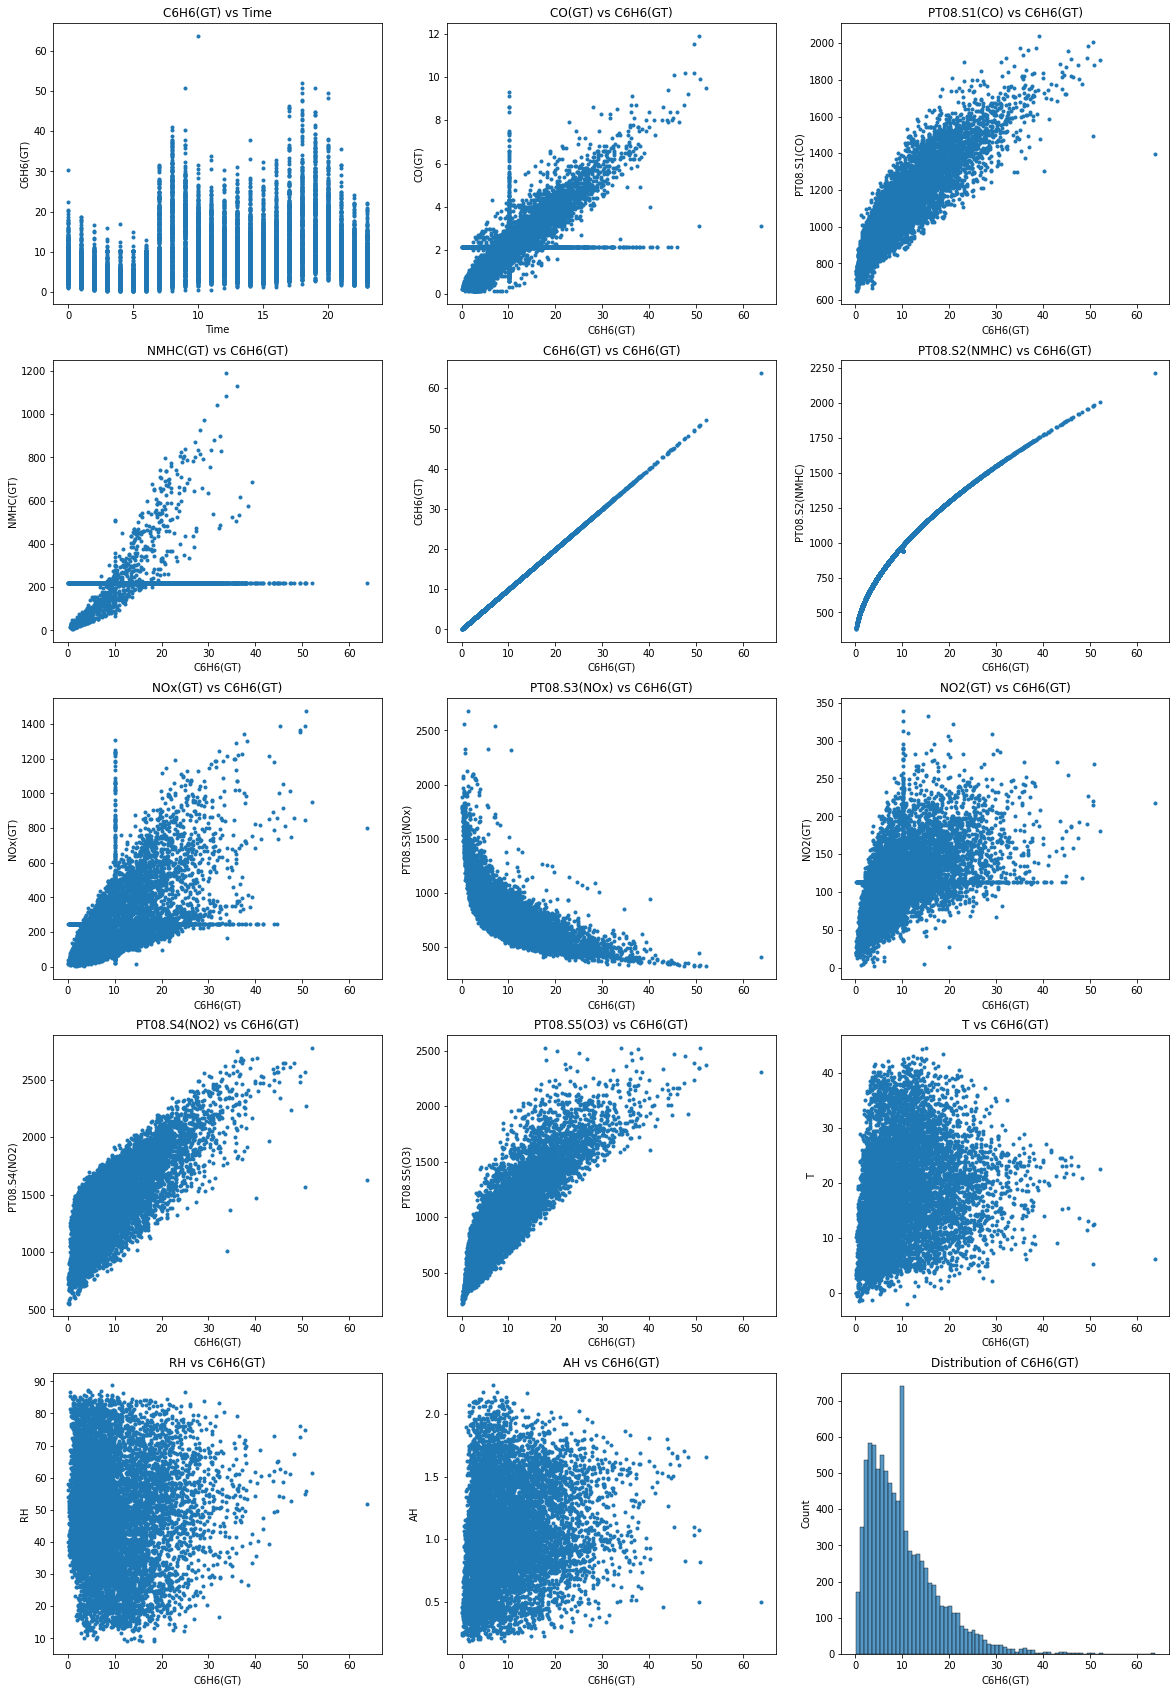

In [ ]:
plt.figure( figsize=(20,30) )

plt.subplot(5 , 3, 1)
plt.scatter(  y = air_df[ "C6H6(GT)" ], x =air_df["Time"], marker="." )
plt.ylabel("C6H6(GT)")
plt.xlabel("Time")
plt.title ("C6H6(GT) vs Time")

for i in range( 2 , 15 ):
    plt.subplot(5 , 3, i)
    plt.scatter(  x= air_df[ "C6H6(GT)" ], y=air_df[ air_df.columns[i]], marker="." )
    plt.xlabel("C6H6(GT)")
    plt.ylabel(attributes[i])
    plt.title (  attributes[i] +" vs C6H6(GT)")
    
plt.subplot(5 , 3, i+1)
sns.histplot(air_df["C6H6(GT)"])
plt.title ( "Distribution of C6H6(GT)")
plt.show()

# Analysis of "Temperature" attribute

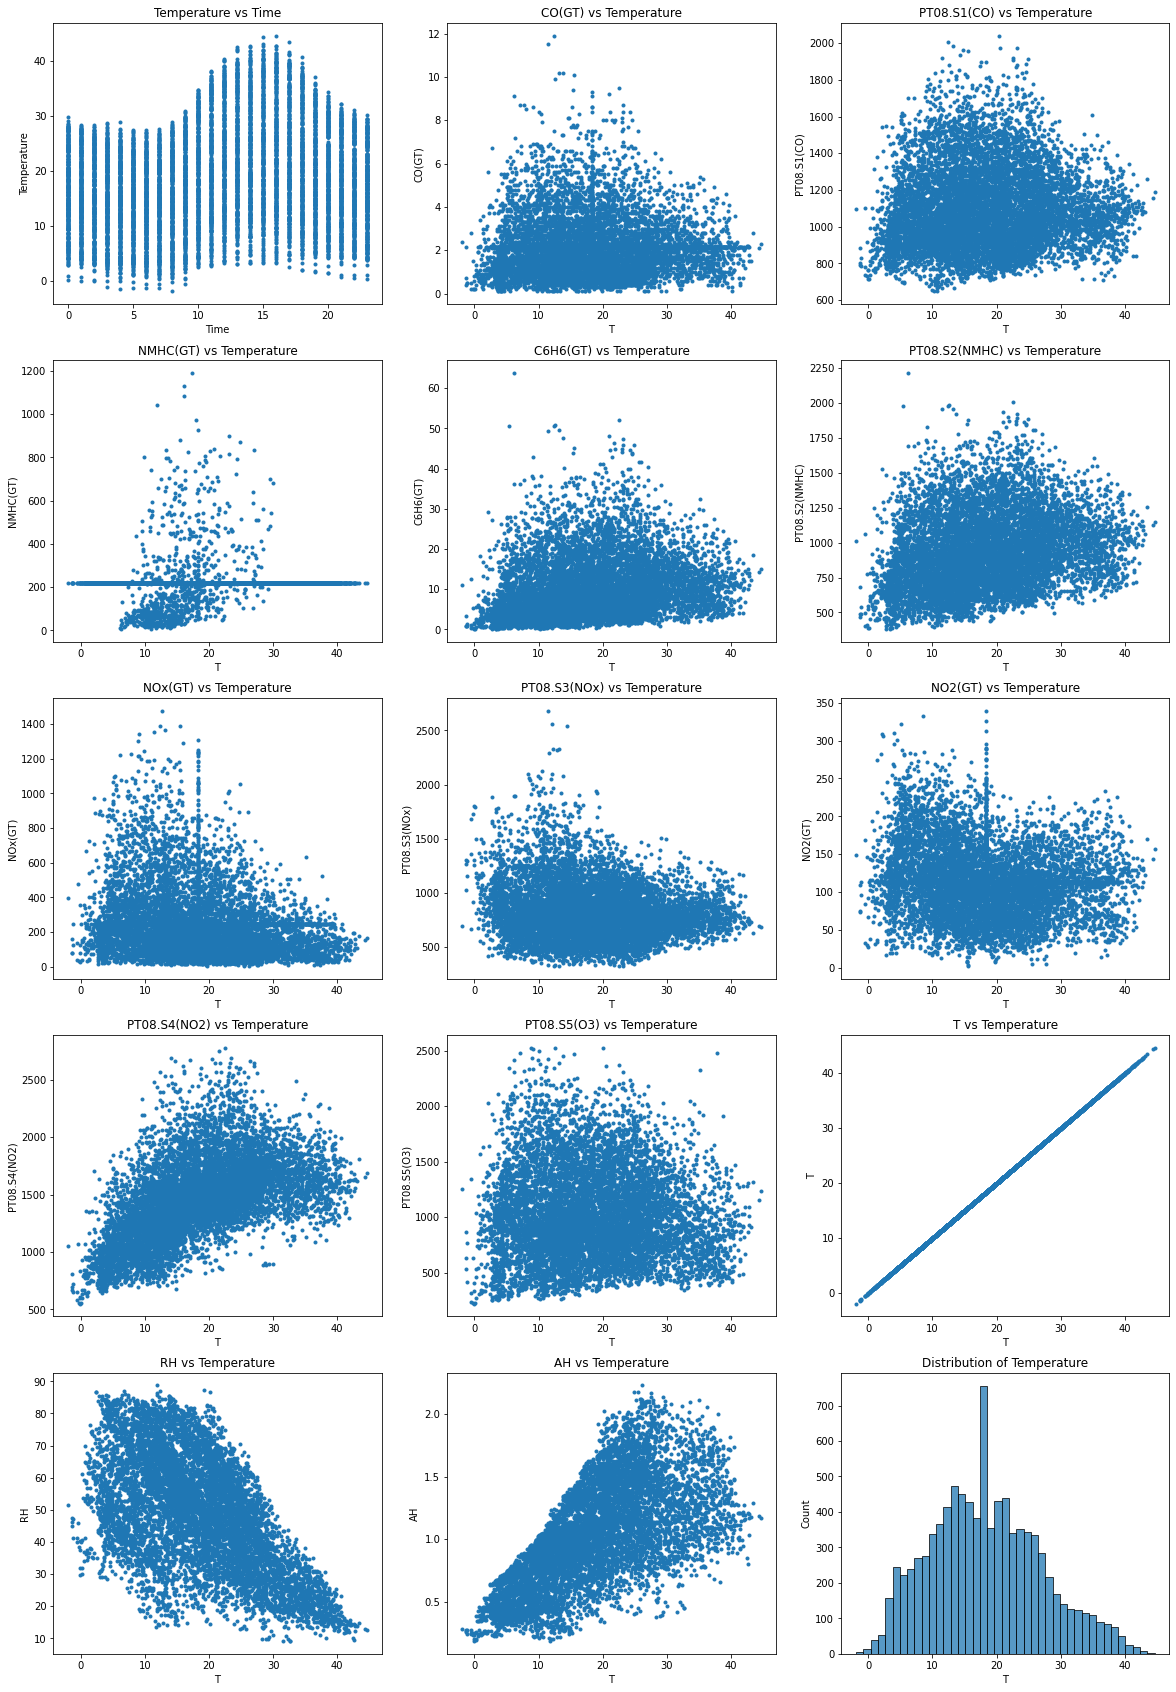

In [ ]:
plt.figure( figsize=(20,30) )

plt.subplot(5 , 3, 1)
plt.scatter(  y = air_df[ "T" ], x =air_df["Time"], marker="." )
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.title ("Temperature vs Time")

for i in range( 2 , 15 ):
    plt.subplot(5 , 3, i)
    plt.scatter(  x= air_df[ "T" ], y=air_df[ air_df.columns[i]], marker="." )
    plt.xlabel("T")
    plt.ylabel(attributes[i])
    plt.title (  attributes[i] +" vs Temperature")
    
plt.subplot(5 , 3, i+1)
sns.histplot(air_df["T"])
plt.title ( "Distribution of Temperature" )
plt.show()

#Corealtion matrix of the attributes

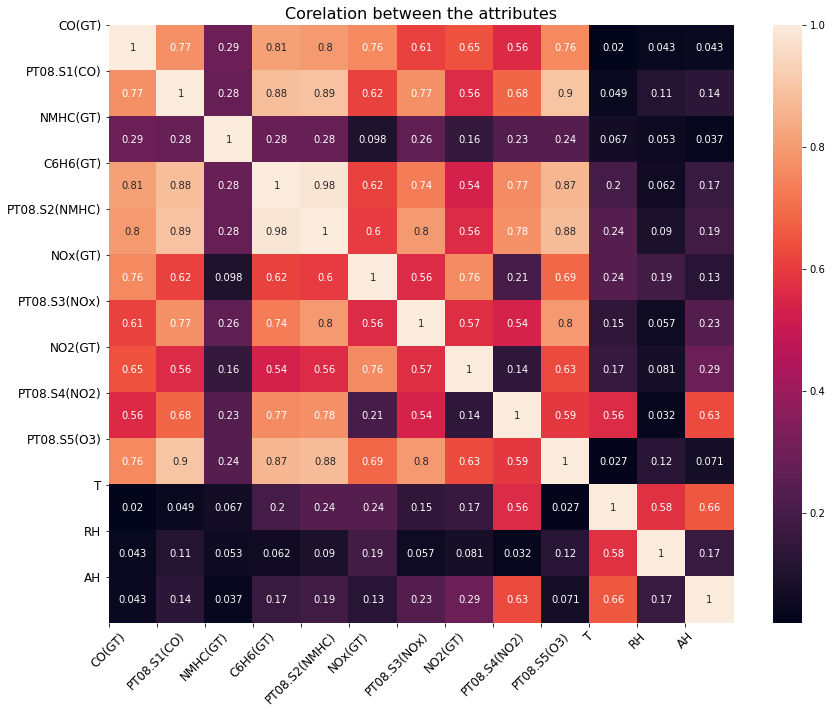

In [ ]:
f = plt.figure(figsize=(14, 11))

plt.title( "Corelation between the attributes" ,  fontsize=16)
# cb = plt.colorbar()

corrMatrix = air_df.drop(columns=['Date', 'Time', 'DateTime']).corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.xticks( range(13), labels=air_df.columns[2:15] , fontsize=12, rotation=45)
plt.yticks( range(13), labels=air_df.columns[2:15] ,fontsize=12)
plt.show()

In [ ]:
air_df.drop(columns=['Date', 'Time', 'DateTime']).corr().abs()

##Relative Humidity vs Temperature

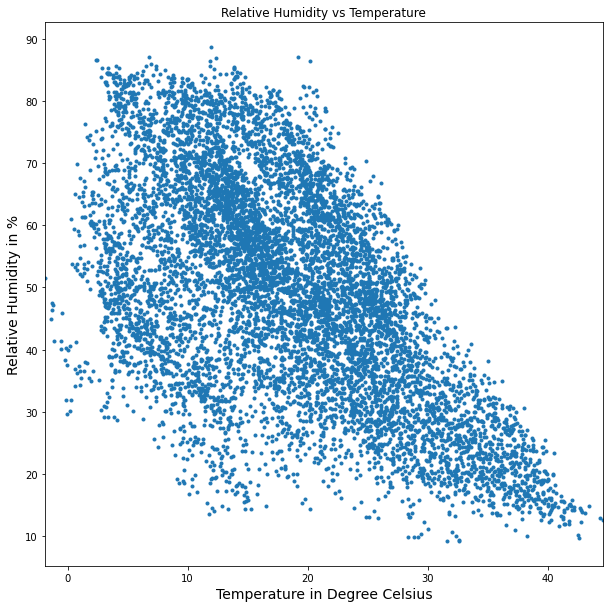

In [ ]:
plt.xlabel("Temperature in Degree Celsius", fontsize=14)
plt.ylabel('Relative Humidity in %', fontsize=14)
plt.xlim(  min(air_df['T']) , max(air_df['T']) )
plt.title("Relative Humidity vs Temperature", )
plt.scatter(air_df['T'],air_df["RH"], marker=".")
plt.show()

#Seaborn library

In [ ]:
sns.pairplot(air_df.drop(columns=['Date', 'Time', 'DateTime']))
plt.rcParams['figure.figsize']=(10,10)